## Final Project Submission

Please fill out:
* Student name: **Rich Caputo**
* Student pace: **self paced** 
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL: https://friendlydata.blog/


# Welcome!

In this project, we will be analyzing a dataset on housing in King's County. Our goal is to build a linear model for predicting the price of houses based on the other metrics provided.

First, we will import our relevant packages and load the data. Then, we will do some preliminary exploration of the data and make decisions on the best way to get our data ready for model building. Finally, we will build, test, and improve our linear model. Let's dive in!

In [459]:
# Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

%matplotlib inline

In [286]:
# Load data
df = pd.read_csv('kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [287]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


We see that most of our data is numeric (either int64 or float64). This is good! However, we do see some issues jumping out at us. First, we see that sqft_basement is cast as an object. Let's see what's going on there.

In [288]:
df.sqft_basement.value_counts()

0.0       12826
?           454
600.0       217
500.0       209
700.0       208
800.0       201
400.0       184
1000.0      148
300.0       142
900.0       142
200.0       105
750.0       104
480.0       103
450.0       103
530.0       103
720.0        98
620.0        90
580.0        84
840.0        83
420.0        81
860.0        79
1100.0       78
670.0        78
780.0        76
550.0        76
650.0        75
240.0        74
680.0        73
380.0        73
850.0        72
          ...  
248.0         1
792.0         1
2250.0        1
1920.0        1
2730.0        1
4130.0        1
2190.0        1
1008.0        1
768.0         1
2500.0        1
861.0         1
2400.0        1
475.0         1
1770.0        1
946.0         1
2130.0        1
784.0         1
704.0         1
2120.0        1
1990.0        1
2810.0        1
506.0         1
1960.0        1
2600.0        1
2580.0        1
266.0         1
3260.0        1
1281.0        1
2240.0        1
176.0         1
Name: sqft_basement, Len

Aha, there is a value labeled as `?` appearing 454 times. We need to fix this. Since the vast majority of this feature is represented as `0`, and only a small portion is represented as `?`, it is probably a good idea to cast `?` to `0`. 

In [289]:
df.loc[df.sqft_basement == '?', 'sqft_basement'] = 0.0
df.sqft_basement = df.sqft_basement.astype('float64')

In [290]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null float64
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(9), int64(11), object(1)
memory usage: 3.5+ MB


Next, we need to investigate columns with `NaN` values.

In [291]:
df.yr_renovated.isna().sum()

3842

In [292]:
df.yr_renovated.value_counts()

0.0       17011
2014.0       73
2003.0       31
2013.0       31
2007.0       30
2000.0       29
2005.0       29
1990.0       22
2004.0       22
2009.0       21
1989.0       20
2006.0       20
2002.0       17
1991.0       16
1998.0       16
1984.0       16
1999.0       15
2008.0       15
2010.0       15
2001.0       15
1983.0       15
2015.0       14
1985.0       14
1986.0       14
1987.0       14
1994.0       14
1992.0       13
1993.0       12
1997.0       12
1995.0       12
          ...  
1975.0        5
1964.0        5
1969.0        4
1963.0        4
1973.0        4
1981.0        4
1965.0        4
1978.0        3
1960.0        3
1958.0        3
1956.0        3
1955.0        3
1945.0        3
1972.0        3
1967.0        2
1957.0        2
1940.0        2
1974.0        2
1962.0        2
1953.0        1
1950.0        1
1934.0        1
1944.0        1
1976.0        1
1948.0        1
1946.0        1
1959.0        1
1971.0        1
1951.0        1
1954.0        1
Name: yr_renovated, Leng

In [293]:
df.waterfront.isna().sum()

2376

In [294]:
df.waterfront.value_counts()

0.0    19075
1.0      146
Name: waterfront, dtype: int64

For both of these columns, `0.0` is very dominant. Similarly as before, we will cast `NaN` values as `0.0`. 

In [295]:
df.waterfront.fillna(0, inplace=True)
df.yr_renovated.fillna(0, inplace=True)

In [296]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       21597 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null float64
yr_built         21597 non-null int64
yr_renovated     21597 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(9), int64(11), object(1)
memory usage: 3.5+ MB


There are still a small number of rows with NaN view values. Let's examine this.

In [297]:
df.view.value_counts()

0.0    19422
2.0      957
3.0      508
1.0      330
4.0      317
Name: view, dtype: int64

Again, `0.0` is a clear winner! We will cast `NaN` as `0.0` here too. 

In [298]:
df.view.fillna(0, inplace=True)

In [299]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       21597 non-null float64
view             21597 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null float64
yr_built         21597 non-null int64
yr_renovated     21597 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(9), int64(11), object(1)
memory usage: 3.5+ MB


Okay, great, now each column has the same number of non-null entries and has an appropriate dtype (except for date, but we will fix that momentarily)! Our next step is to clean the data further so that it is model-ready. First, we will drop the id column since we won't need it for modeling purposes.

In [300]:
df.drop(['id'], axis=1, inplace=True)

Next, we need to figure out what to do with our date column. If sales go back far enough in time, we may see inflation / market fluctuations play an effect in our model. Let's examine this.

In [301]:
# Cast date to datetime format
df.date = pd.to_datetime(df.date)

In [302]:
df.date.max() - df.date.min()

Timedelta('390 days 00:00:00')

We see that our dates span roughly a year. We will assume that this timeframe is not long enough to have a significant affect and will thus drop the date column.

In [303]:
df.drop(['date'], axis=1, inplace=True)

We still have some columns that are not model ready. In particular, we need to do something about our location data so that a  linear model will perform well. We will use binning so that houses in a similar area are binned together. First, let's examine the zipcode column.

In [304]:
df.zipcode.value_counts()

98103    602
98038    589
98115    583
98052    574
98117    553
98042    547
98034    545
98118    507
98023    499
98006    498
98133    493
98059    468
98058    455
98155    446
98074    441
98033    432
98027    412
98125    409
98056    406
98053    403
98001    361
98075    359
98126    354
98092    351
98144    343
98106    335
98116    330
98029    321
98199    317
98004    317
        ... 
98112    269
98168    269
98055    268
98107    266
98136    263
98178    262
98030    256
98177    255
98166    254
98022    233
98105    229
98045    220
98002    199
98077    198
98011    195
98019    190
98108    186
98119    184
98005    168
98007    141
98188    136
98032    125
98014    124
98070    117
98109    109
98102    104
98010    100
98024     80
98148     57
98039     50
Name: zipcode, Length: 70, dtype: int64

Okay, there are 70 different zip codes. It is obvious that prices will not have a linear relationship with simply a zip code number. However, geographical location will certainly have an influence on housing prices. It may be easier to work with the provided lattitude and longitude columns. Let's plot their relationship with price. We will use a diverging colorbar to make it clear when an area is more expensive vs. less expensive

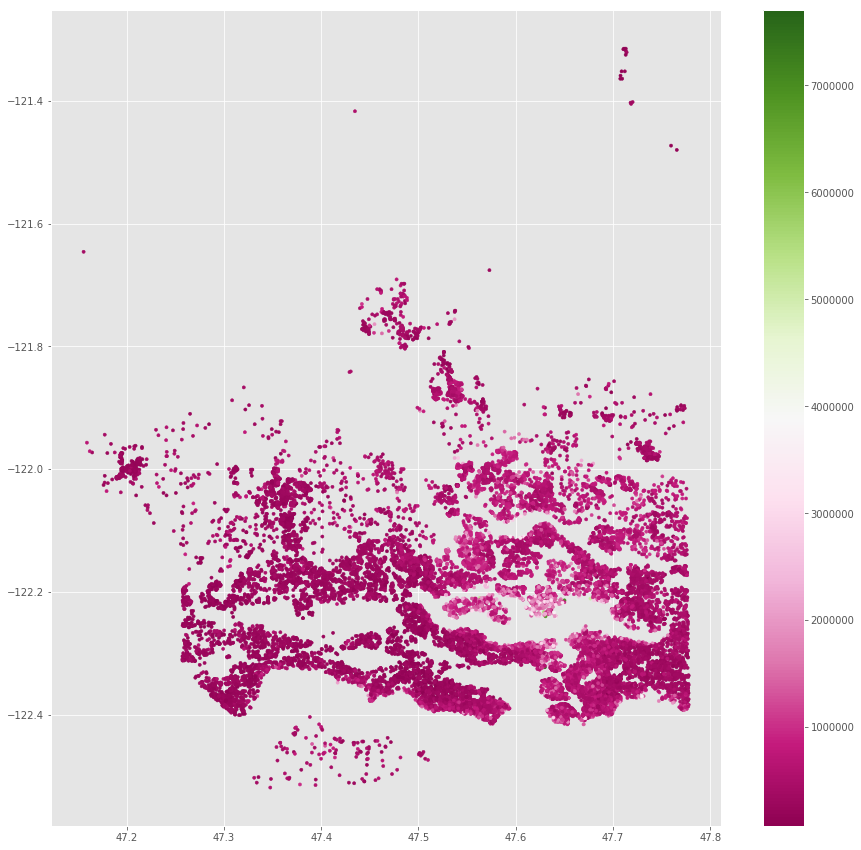

In [305]:
plt.style.use('ggplot')
plt.figure(figsize=(15, 15))
plt.scatter(df.lat, df.long, c=df.price, s=10, cmap='PiYG')
plt.colorbar()

This plot shows that GPS location has a clear affect on price. Additionally, it captures more information than the zipcode column since it is more granular. However, we still need to figure out a creative way to make this feature usable for a linear model. 

One way to do this is binning, where bins of GPS locations are represented using one-hot encoding. But, doing this using lat and long separately will only bin the data rectangularly. This would lose a lot of predictive power and lead to model bias. Instead, we are going to use a fancy tool called spectral clustering to capture geographical clusters in our data. This will allow us to effectively bin our geographical data and retain a lot of predictive power.



In [306]:
X = df[['lat', 'long']]

In [307]:
from sklearn.cluster import SpectralClustering
model = SpectralClustering(n_clusters=10, affinity='nearest_neighbors',
                           assign_labels='kmeans')
labels = model.fit_predict(X)

C:\Users\rcapu\Anaconda3\envs\learn-env\lib\site-packages\sklearn\manifold\spectral_embedding_.py:237: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


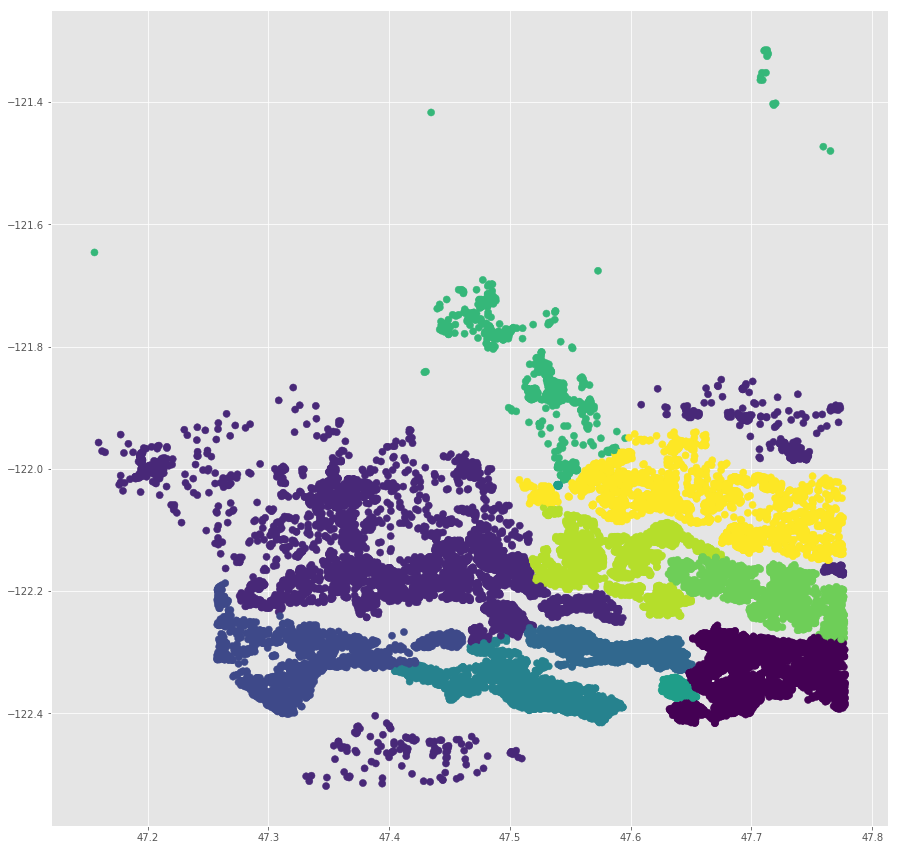

In [308]:
plt.figure(figsize=(15, 15))
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=labels,
            s=50, cmap='viridis');

Wow, that did a great job capturing the geographical nuances of our data. Using these labels, we will create new columns to represent geographical location based on our cluster bins. Of course, this won't perfectly capture all the information provided, but it will definitely allow us to build a linear relationship between price and location. Let's take a look at what the bin labels look like.

In [309]:
labels[:10]

array([1, 0, 7, 4, 9, 9, 2, 2, 4, 1])

We see that each label represents numerically the cluster that data point belongs to. This can be easily fit into our dataset!

In [310]:
df['location'] = labels

In [311]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 20 columns):
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       21597 non-null float64
view             21597 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null float64
yr_built         21597 non-null int64
yr_renovated     21597 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
location         21597 non-null int32
dtypes: float64(9), int32(1), int64(10)
memory usage: 3.2 MB


In [312]:
df.location = df.location.astype('category')
df = pd.get_dummies(df)

In [313]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 29 columns):
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       21597 non-null float64
view             21597 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null float64
yr_built         21597 non-null int64
yr_renovated     21597 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
location_0       21597 non-null uint8
location_1       21597 non-null uint8
location_2       21597 non-null uint8
location_3       21597 non-null uint8

Boom! That's the power of one-hot encoding. We just dealt with a problematic subset of our data and made it look easy. We can now drop our lat, long, and zipcode columns.

In [314]:
df.drop(['lat', 'long', 'zipcode'], axis=1, inplace=True)

We are almost done cleaning the data. Before we figure out which transformations / normalizations we need to do, we need to deal with the columns yr_built and yr_renovated. As we saw before, a vast majority of houses were not rennovated. Thus, it will be much easier to represent yr_rennovated as a binary variable: 1 if rennovated, 0 if not rennovated. Although this is a simplification, it will be much better for modeling purposes.

In [315]:
df['renovated'] = (df.yr_renovated > 0).astype('uint8')
df.drop(['yr_renovated'], axis=1, inplace=True)

In [316]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 26 columns):
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       21597 non-null float64
view             21597 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null float64
yr_built         21597 non-null int64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
location_0       21597 non-null uint8
location_1       21597 non-null uint8
location_2       21597 non-null uint8
location_3       21597 non-null uint8
location_4       21597 non-null uint8
location_5       21597 non-null uint8
location_6       21597 non-null uint8
location_7       21597 non-null uint8
locat

In [317]:
df.renovated.value_counts()

0    20853
1      744
Name: renovated, dtype: int64

Now, we need to figure out what to do with yr_built. Let's visualize it's relationship with price.

Text(0, 0.5, 'Price ($)')

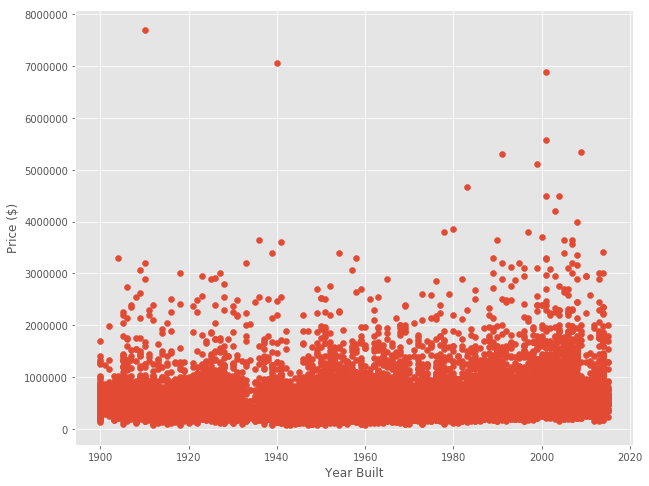

In [318]:
plt.figure(figsize=(10, 8))
plt.scatter(df.yr_built, df.price)
plt.xlabel('Year Built')
plt.ylabel('Price ($)')

It's tough to see the relationship here. Instead, let's visualize the mean home price per year.

Text(0, 0.5, 'Mean Price ($)')

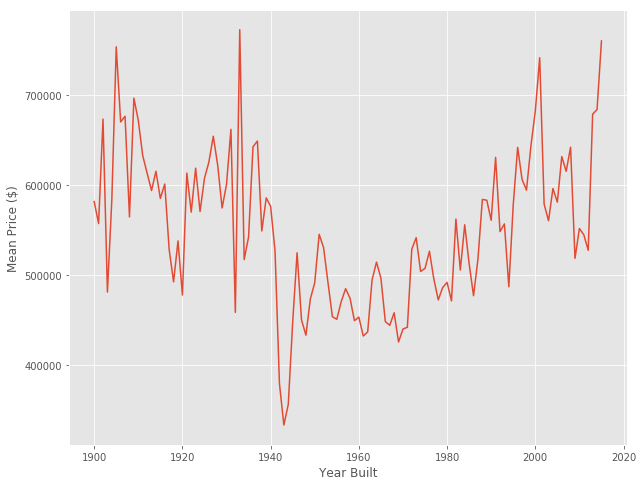

In [319]:
plt.figure(figsize=(10, 8))
plt.plot(df.groupby('yr_built')['price'].mean())
plt.xlabel('Year Built')
plt.ylabel('Mean Price ($)')

Despite the fact that there is a lot of noise and seasonality in this plot, it seems that price does contain a time trend (not surprising), but it is not entirely linear. Thus, it seems best to use binning instead.

In [320]:
df.yr_built.min(), df.yr_built.max()

(1900, 2015)

We will bin according to decade for simplicity. This should capture enough of the trend without being too exposed to noise. 

In [321]:
bins = list(range(1899, 2020, 10))
# use pd.cut
bins_yr = pd.cut(df.yr_built, bins)

In [322]:
# Sanity check
bins_yr.isna().sum()

0

In [323]:
df['yr_built'] = bins_yr.astype('category')

In [324]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 26 columns):
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       21597 non-null float64
view             21597 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null float64
yr_built         21597 non-null category
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
location_0       21597 non-null uint8
location_1       21597 non-null uint8
location_2       21597 non-null uint8
location_3       21597 non-null uint8
location_4       21597 non-null uint8
location_5       21597 non-null uint8
location_6       21597 non-null uint8
location_7       21597 non-null uint8
lo

In [325]:
df = pd.get_dummies(df)

In [326]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 37 columns):
price                    21597 non-null float64
bedrooms                 21597 non-null int64
bathrooms                21597 non-null float64
sqft_living              21597 non-null int64
sqft_lot                 21597 non-null int64
floors                   21597 non-null float64
waterfront               21597 non-null float64
view                     21597 non-null float64
condition                21597 non-null int64
grade                    21597 non-null int64
sqft_above               21597 non-null int64
sqft_basement            21597 non-null float64
sqft_living15            21597 non-null int64
sqft_lot15               21597 non-null int64
location_0               21597 non-null uint8
location_1               21597 non-null uint8
location_2               21597 non-null uint8
location_3               21597 non-null uint8
location_4               21597 non-null uint8
locat

Now that's a clean dataset! Okay, all are columns are exactly in the right format. The last step is to transform the data to make it as 'normal' as possible. Let's do some exploratory statistical analysis. We can safely ignore our categorical variables for this phase.

In [327]:
df.iloc[:, :14].describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,sqft_living15,sqft_lot15
count,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.006760,0.233181,3.409825,7.657915,1788.596842,285.716581,1986.620318,12758.283512
std,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.081944,0.764673,0.650546,1.173200,827.759761,439.819830,685.230472,27274.441950
min,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,0.000000,399.000000,651.000000
25%,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,550.000000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,6210.000000,871200.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001A2800DD128>,
      dtype=object)

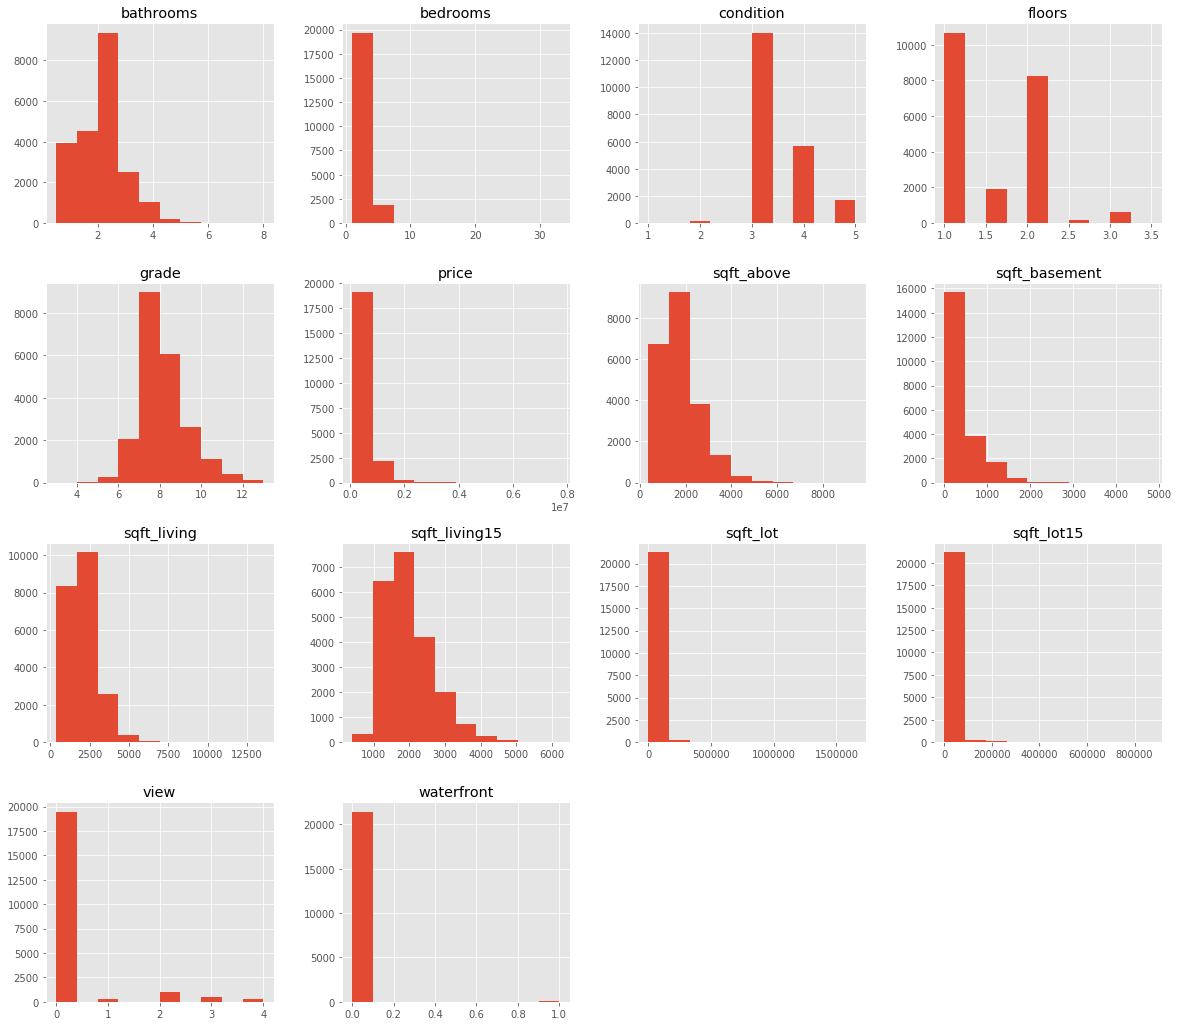

In [328]:
df_num.hist(figsize=(20, 18))

Some things immediately jump out at us. First, we see that many columns are negatively skewed. Furthermore, we see that our view variable is needlessly complex. Let's transform our view variable to a binary (i.e. 1 for view, 0 for non-view). Additionally, we will log transform our sqft variables. Finally, we need to log-transform our price variable.

In [329]:
df['view'] = (df['view'] > 0).astype('uint8')

In [330]:
df[[x for x in df.columns if x.startswith('sqft')]] = np.log(df[[x for x in df.columns if x.startswith('sqft')]])

In [331]:
# Corrects np.log(0)
df[np.isneginf(df)]=0

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001A2EF60A128>,
      dtype=object)

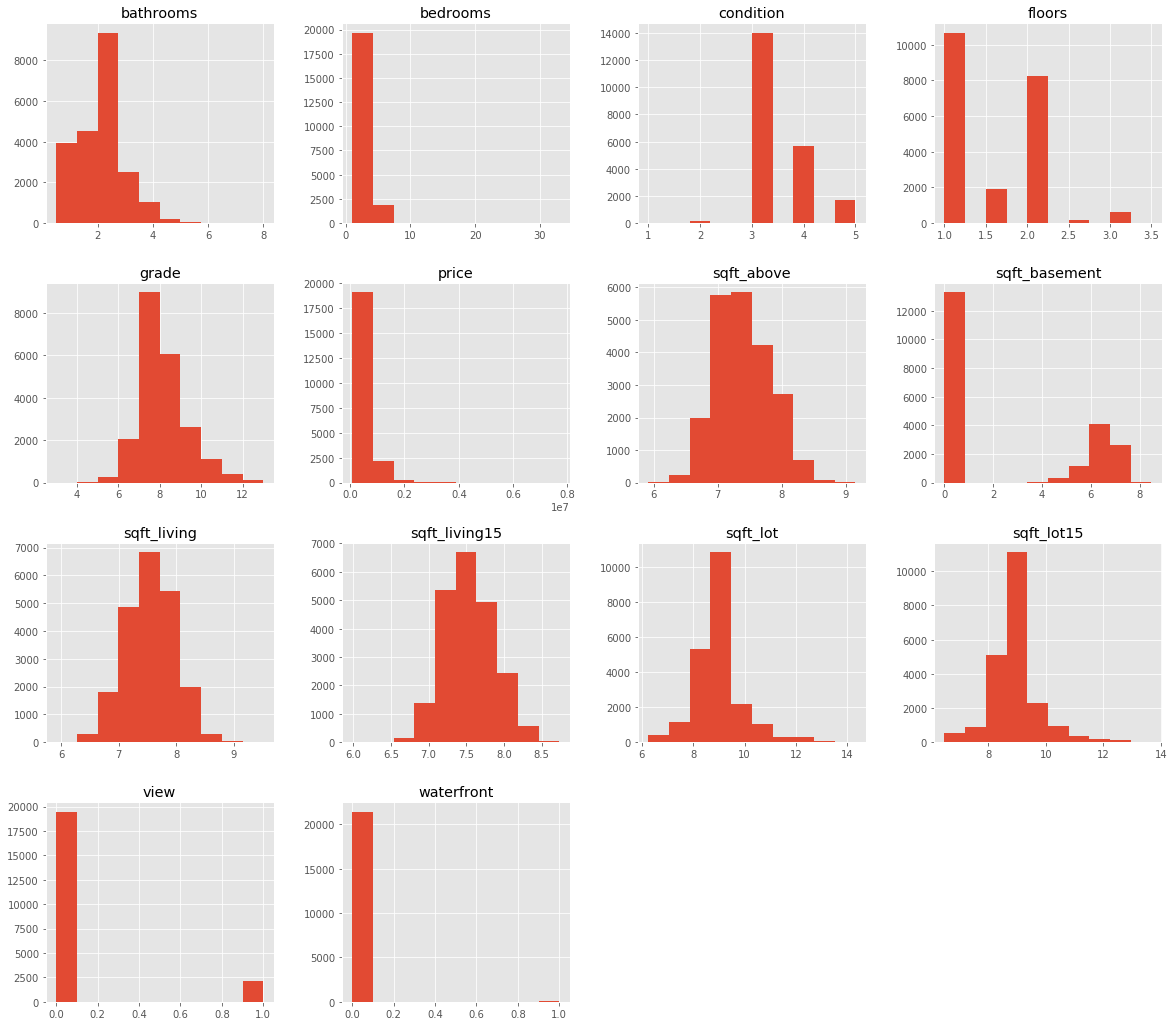

In [332]:
df.iloc[:, :14].hist(figsize=(20, 18))

That already looks much better! Let's also log-transform price.

In [333]:
df[['price']] = np.log(df[['price']])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001A280C081D0>,
      dtype=object)

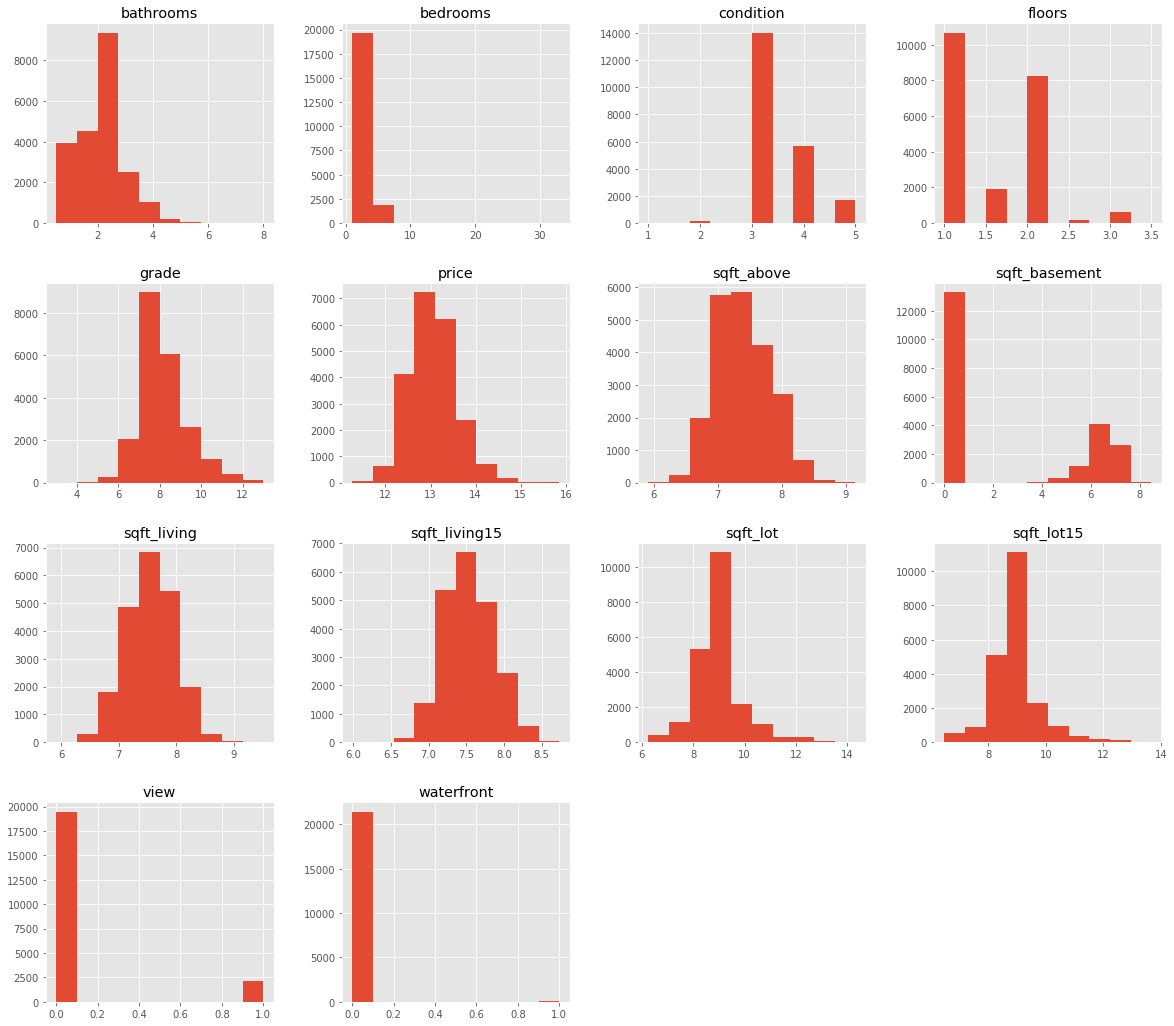

In [334]:
df.iloc[:, :14].hist(figsize=(20, 18))

An issue to notice is that a large number of sqft_basement labels are set to zero. To combat this, we will do some feature engineering and set sqft_above and sqft_below to a single summed variable. In fact, that is already represented by sqft_living. Then, we will create a new binary variable that indicates if the housing unit has a basement or not.

In [335]:
df['basement'] = (df.sqft_basement > 0).astype('uint8')

In [336]:
df.drop(['sqft_above', 'sqft_basement'], axis=1, inplace=True)

In [337]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 36 columns):
price                    21597 non-null float64
bedrooms                 21597 non-null int64
bathrooms                21597 non-null float64
sqft_living              21597 non-null float64
sqft_lot                 21597 non-null float64
floors                   21597 non-null float64
waterfront               21597 non-null float64
view                     21597 non-null uint8
condition                21597 non-null int64
grade                    21597 non-null int64
sqft_living15            21597 non-null float64
sqft_lot15               21597 non-null float64
location_0               21597 non-null uint8
location_1               21597 non-null uint8
location_2               21597 non-null uint8
location_3               21597 non-null uint8
location_4               21597 non-null uint8
location_5               21597 non-null uint8
location_6               21597 non-null uint8
l

We now need to figure out what to do about the bedrooms and bathrooms features. Let's examine them using boxplots.

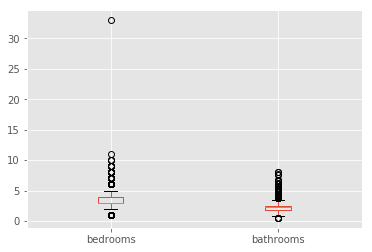

In [338]:
df[['bedrooms', 'bathrooms']].boxplot()

The problem with these variables is that there are massive outliers! Let's examine the numbers.

In [339]:
df[['bedrooms', 'bathrooms']].describe()

,bedrooms,bathrooms
count,21597.000000,21597.000000
mean,3.373200,2.115826
std,0.926299,0.768984
min,1.000000,0.500000
25%,3.000000,1.750000
50%,3.000000,2.250000
75%,4.000000,2.500000
max,33.000000,8.000000


Wow, there's a house with 33 bedrooms. Let's take a look at that entry.

In [340]:
df[df['bedrooms'] == 33]

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,"yr_built_(1929, 1939]","yr_built_(1939, 1949]","yr_built_(1949, 1959]","yr_built_(1959, 1969]","yr_built_(1969, 1979]","yr_built_(1979, 1989]","yr_built_(1989, 1999]","yr_built_(1999, 2009]","yr_built_(2009, 2019]",basement
15856,13.369223,33,1.75,7.390181,8.699515,1.0,0.0,0,5,7,...,0,1,0,0,0,0,0,0,0,1


Hmm.. 33 bedrooms but only 1.75 bathrooms? Something doesn't seem right. Maybe there is an error in our data? Nonetheless, we have plenty of data already, so there won't be much harm in dropping this row.

In [341]:
df.drop(df[df['bedrooms'] == 33].index, axis=0, inplace=True)

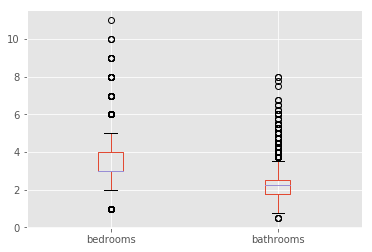

In [342]:
df[['bedrooms', 'bathrooms']].boxplot()

Okay, that's more reasonable. It is difficult to tell if a log transform for these two variables is appropriate. For one thing we don't want the model to overpredict price, but on the other hand, we want to make sure our model performs well on every data point. For now, we will leave these variables as is and make changes later on if we need to.

Let's now try to find any multicolinearity in our data. We can use a seaborn heatmap for this.

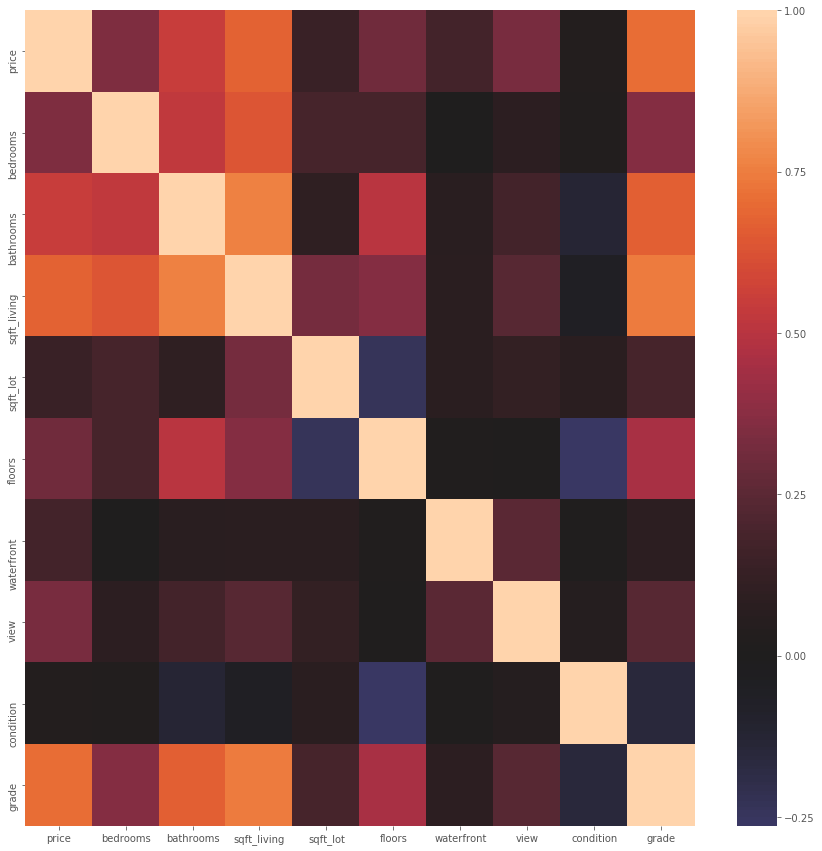

In [343]:
plt.figure(figsize=(15, 15))
sns.heatmap(df.iloc[:, :10].corr(), center=0);

In [344]:
df.iloc[:, :10].corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade
price,1.000000,0.350871,0.551270,0.674820,0.138271,0.310665,0.170724,0.329043,0.038855,0.703747
bedrooms,0.350871,1.000000,0.527870,0.637670,0.189953,0.183707,-0.002054,0.081678,0.023440,0.366174
bathrooms,0.551270,0.527870,1.000000,0.762133,0.100617,0.502574,0.063628,0.175879,-0.126443,0.665834
sqft_living,0.674820,0.637670,0.762133,1.000000,0.325979,0.367556,0.078898,0.237822,-0.049584,0.743036
sqft_lot,0.138271,0.189953,0.100617,0.325979,1.000000,-0.237479,0.072339,0.112091,0.073741,0.184316
floors,0.310665,0.183707,0.502574,0.367556,-0.237479,1.000000,0.020794,0.016297,-0.264013,0.458783
waterfront,0.170724,-0.002054,0.063628,0.078898,0.072339,0.020794,1.000000,0.248683,0.016659,0.082817
view,0.329043,0.081678,0.175879,0.237822,0.112091,0.016297,0.248683,1.000000,0.046879,0.235245
condition,0.038855,0.023440,-0.126443,-0.049584,0.073741,-0.264013,0.016659,0.046879,1.000000,-0.146854
grade,0.703747,0.366174,0.665834,0.743036,0.184316,0.458783,0.082817,0.235245,-0.146854,1.000000


The grade column seems highly correlated with other variables. It is probably a redundant variable, so we will drop it.

In [346]:
df.drop(['grade'], axis=1, inplace=True)

Although there are other correlated features, we will keep them for now. Finally, let's build a pipeline that will clean the data set for us exactly as we have just done. Furthermore, we will compare this one hot encoded model to the data had we not done one hot encoding. We will also want to use the same training and test sets for all future data imports.

In [660]:
def location_transform(df, n=10):
    """ Allows us to keep a uniform transformation for many models. """
    model = SpectralClustering(n_clusters=n, affinity='nearest_neighbors',
                           assign_labels='kmeans')
    labels = model.fit_predict(df[['lat', 'long']])
    return labels, df[['lat', 'long']]
    
    
def predict_cluster(data_point, labels, gps):
    """ Assigns new data to a cluster based on proximity. """
    df = gps
    df['labels'] = labels
    
    x = (df['lat'] - data_point['lat'])**2
    y = (df['long'] - data_point['long'])**2
    
    inds = np.argmin(x + y)
    
    return df[['labels']].iloc[inds, :]
    

def data_clean(df_load):
    """ Cleans data without using feature engineering. """
    # Appropriate conversions
    df = df_load.copy()
    df.waterfront.fillna(0, inplace=True)
    df.yr_renovated.fillna(0, inplace=True)
    df.view.fillna(0, inplace=True)
    
    # Modify for model ready
    df.loc[df.sqft_basement == '?', 'sqft_basement'] = 0.0
    df['sqft_basement'] = df['sqft_basement'].astype('float64')
    df.drop(['id', 'date', 'zipcode', 'grade'], axis=1, inplace=True)
    
    return df
    
    
def data_transform(df_load, labels):
    """ Transforms data set with given cluster model and applies log transform. """
    df = df_load.copy()
    
    # Get clusters
    df['location'] = labels
    
    # Appropriate conversions
    df = data_clean(df)
    
    # Simplify variables 
    df['basement'] = (df.sqft_basement > 0).astype('uint8')
    df['renovated'] = (df.yr_renovated > 0).astype('uint8')
    df['view'] = (df['view'] > 0).astype('uint8')

    # Bin years
    bins = list(range(1899, 2020, 10))
    df['yr_built'] = pd.cut(df.yr_built, bins)
    
    # Log transform
    df[[x for x in df.columns if x.startswith('sqft')]] = np.log(df[[x for x in df.columns if x.startswith('sqft')]])
    
    
    # Drop unneeded
    df.drop(['sqft_basement', 'sqft_above', 'yr_renovated', 'lat', 'long'], axis=1, inplace=True)
    
    # Convert to category and one-hot encode
    df[['location', 'yr_built', 'condition']] = df[['location', 'yr_built', 'condition']].astype('category')
    df = pd.get_dummies(df)
    
    return df


We will not log transform the response variable price in the above functions. We will do that when fitting models

In [677]:
# Reload and test function
df_load = pd.read_csv('kc_house_data.csv')
labels, gps = location_transform(df_load)
df_final = data_transform(df_load, labels)
df_final.info()

C:\Users\rcapu\Anaconda3\envs\learn-env\lib\site-packages\sklearn\manifold\spectral_embedding_.py:237: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 39 columns):
price                    21597 non-null float64
bedrooms                 21597 non-null int64
bathrooms                21597 non-null float64
sqft_living              21597 non-null float64
sqft_lot                 21597 non-null float64
floors                   21597 non-null float64
waterfront               21597 non-null float64
view                     21597 non-null uint8
sqft_living15            21597 non-null float64
sqft_lot15               21597 non-null float64
basement                 21597 non-null uint8
renovated                21597 non-null uint8
condition_1              21597 non-null uint8
condition_2              21597 non-null uint8
condition_3              21597 non-null uint8
condition_4              21597 non-null uint8
condition_5              21597 non-null uint8
yr_built_(1899, 1909]    21597 non-null uint8
yr_built_(1909, 1919]    21597 non-null uint8
y

Great! We are ready to start building models. First, we will get our relevant X and y values and split them into training and test sets. Furthermore, we will do the same for a dataset which is clean but not transformed and compare the two.

In [678]:
df_reg = data_clean(df_load)
df_reg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 17 columns):
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       21597 non-null float64
view             21597 non-null float64
condition        21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null float64
yr_built         21597 non-null int64
yr_renovated     21597 non-null float64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(9), int64(8)
memory usage: 2.8 MB


In [679]:
# Use same random state to compare
X_1, y_1 = df_final[[x for x in df_final.columns if x != 'price']], df_final[['price']]
X1_train, X1_test, y1_train, y1_test = train_test_split(X_1, y_1, test_size = 0.2, random_state=123)

X_2, y_2 = df_reg[[x for x in df_reg.columns if x != 'price']], df_reg[['price']]
X2_train, X2_test, y2_train, y2_test = train_test_split(X_2, y_2, test_size = 0.2, random_state=123)

In [681]:
# Sanity Check
all(y1_test == y2_test) and all(y1_train == y2_train) and all(X1_test.index == X2_test.index) and all(X1_train.index == X2_train.index)

True

In [683]:
# SM to check p-values for transformed data
model_1 = sm.OLS(np.log(y1_train), sm.add_constant(X1_train)).fit()
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.772
Model:                            OLS   Adj. R-squared:                  0.771
Method:                 Least Squares   F-statistic:                     1665.
Date:                Wed, 06 Feb 2019   Prob (F-statistic):               0.00
Time:                        09:43:04   Log-Likelihood:                -701.91
No. Observations:               17277   AIC:                             1476.
Df Residuals:                   17241   BIC:                             1755.
Df Model:                          35                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     4.7832      0.047    101.537      0.000       4.691       4.876
bedrooms                 -0.0393      0.003    -14.171      0.000      -0.045      -0.034
bathrooms                 0.0731      0.005     15.895      0.000       0.064       0.082
sqft_living               0.5432      0.010     52.926      0.000       0.523       0.563
sqft_lot                  0.0370      0.006      6.588      0.000       0.026       0.048
floors                    0.0379      0.006      6.571      0.000       0.027       0.049
waterfront                0.4779      0.025     19.172      0.000       0.429       0.527
view                      0.1770      0.007     24.485      0.000       0.163       0.191
sqft_living15             0.2797      0.010     28.359      0.000       0.260       0.299
sqft_lot15               -0.0202      0.006     -3.310      0.001      -0.032      -0.008
basement                 -0.0122      0.005     -2.420      0.016      -0.022      -0.002
renovated                 0.0902      0.011      8.193      0.000       0.069       0.112
condition_1               0.7172      0.043     16.574      0.000       0.632       0.802
condition_2               0.8593      0.022     38.603      0.000       0.816       0.903
condition_3               1.0166      0.014     74.178      0.000       0.990       1.043
condition_4               1.0725      0.014     77.670      0.000       1.045       1.100
condition_5               1.1177      0.015     76.873      0.000       1.089       1.146
yr_built_(1899, 1909]     0.5254      0.012     44.949      0.000       0.502       0.548
yr_built_(1909, 1919]     0.4887      0.011     46.173      0.000       0.468       0.509
yr_built_(1919, 1929]     0.5231      0.009     57.064      0.000       0.505       0.541
yr_built_(1929, 1939]     0.4442      0.012     36.015      0.000       0.420       0.468
yr_built_(1939, 1949]     0.3989      0.008     50.489      0.000       0.383       0.414
yr_built_(1949, 1959]     0.3628      0.007     49.977      0.000       0.349       0.377
yr_built_(1959, 1969]     0.3240      0.007     45.995      0.000       0.310       0.338
yr_built_(1969, 1979]     0.2942      0.007     40.076      0.000       0.280       0.309
yr_built_(1979, 1989]     0.3362      0.008     44.488      0.000       0.321       0.351
yr_built_(1989, 1999]     0.3208      0.008     38.108      0.000       0.304       0.337
yr_built_(1999, 2009]     0.3503      0.008     43.994      0.000       0.335       0.366
yr_built_(2009, 2019]     0.4146      0.010     40.941      0.000       0.395       0.434
location_0                0.5809      0.006     92.680      0.000       0.569       0.593
location_1                0.0733      0.007     10.738      0.000       0.060       0.087
location_2             

In [703]:
# SM to check p-values for regular data
model_2 = sm.OLS(y2_train, sm.add_constant(X2_train)).fit()
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.670
Model:                            OLS   Adj. R-squared:                  0.670
Method:                 Least Squares   F-statistic:                     2195.
Date:                Wed, 06 Feb 2019   Prob (F-statistic):               0.00
Time:                        09:53:22   Log-Likelihood:            -2.3629e+05
No. Observations:               17277   AIC:                         4.726e+05
Df Residuals:                   17260   BIC:                         4.727e+05
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          -5.33e+07   1.81e+06    -29.372      0.000   -5.69e+07   -4.97e+07
bedrooms      -4.242e+04   2192.016    -19.354      0.000   -4.67e+04   -3.81e+04
bathrooms      5.334e+04   3811.311     13.995      0.000    4.59e+04    6.08e+04
sqft_living     157.8815     22.645      6.972      0.000     113.495     202.268
sqft_lot          0.1357      0.054      2.515      0.012       0.030       0.241
floors         1.433e+04   4171.354      3.436      0.001    6154.608    2.25e+04
waterfront     6.636e+05   2.17e+04     30.639      0.000    6.21e+05    7.06e+05
view           5.818e+04   2460.351     23.648      0.000    5.34e+04     6.3e+04
condition      3.346e+04   2712.300     12.337      0.000    2.81e+04    3.88e+04
sqft_above       83.6608     22.625      3.698      0.000      39.313     128.009
sqft_basement    24.0922     22.472      1.072      0.284     -19.955      68.140
yr_built      -1660.1810     81.144    -20.460      0.000   -1819.232   -1501.131
yr_renovated     32.3728      4.560      7.099      0.000      23.434      41.312
lat            6.373e+05   1.21e+04     52.743      0.000    6.14e+05    6.61e+05
long          -2.131e+05   1.38e+04    -15.447      0.000    -2.4e+05   -1.86e+05
sqft_living15    73.1114      3.823     19.124      0.000      65.618      80.605
sqft_lot15       -0.4369      0.084     -5.218      0.000      -0.601      -0.273
==============================================================================
Omnibus:                    12565.161   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           710662.926
Skew:                           2.932   Prob(JB):                         0.00
Kurtosis:                      33.868   Cond. No.                     5.89e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.89e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Although the R2 is higher on the first model, we can't yet affirm that it is better. We need to apply the exponential function to our predictions. Using statsmodels, we can peak under the hood and look at the p-value of each variable. The second model has solid p-values except for sqft_basement, while the first model has good p-values all around. Let's now use sklearn to build and test models more easily. First, we will cross validate each model and compare.

In [686]:
linreg_1 = LinearRegression()
cv_10_results_1 = np.mean(cross_val_score(linreg_1, X1_train, np.log(y1_train), cv=10, scoring="neg_mean_squared_error"))
cv_10_results_1

-0.06394408201041744

In [708]:
linreg_2 = LinearRegression()
cv_10_results_2 = np.mean(cross_val_score(linreg_2, X2_train, y2_train, cv=10, scoring="neg_mean_squared_error"))
cv_10_results_2

-44590190249.396484

Since we are training the first model using a log-transformed price variable, it is somewhat meaningless to compare these CV scores since they have completely different units of measurement. Let's instead compare the R2 scores after converting the predictions of the first model back to true units using the exp function.

In [710]:
# Need to convert to log and then convert back for first dataset
linreg_1.fit(X1_train, np.log(y1_train))
y1_hat_train = np.exp(linreg_1.predict(X1_train))
y1_hat_test = np.exp(linreg_1.predict(X1_test))

In [711]:
print(r2_score(y1_train, y1_hat_train))
print(r2_score(y1_test, y1_hat_test))

0.7302037951231216
0.710968945785556


In [712]:
linreg_2.fit(X2_train, y2_train)
y2_hat_train = linreg_2.predict(X2_train)
y2_hat_test = linreg_2.predict(X2_test)

In [713]:
print(r2_score(y2_train, y2_hat_train))
print(r2_score(y2_test, y2_hat_test))

0.6704994562886972
0.651727218316573


As expected, the transformed data performs better on the test set. Keep in mind that we fit models using the log of pricing. This was useful for the model building stage since it normalized the response variable, but to get a true sense of how our model is performing, we will need to reverse map the price variables. We can do this simply by applying the exponential. By doing this, our model should perform worse (compare statsmodel r2 of first model with above r2), since the exponential function will drastically increase any error we had previously.

In [769]:
# Compare test scores:
print("Raw increase in R2:", r2_score(y1_test, y1_hat_test) - r2_score(y2_test, y2_hat_test))
print("Percentage improvement:", 100*(r2_score(y1_test, y1_hat_test) / r2_score(y2_test, y2_hat_test) - 1), '%')

Raw increase in R2: 0.05924172746898304
Percentage improvement: 9.089957547270444 %


This is where we see the true power of our transformations. We increased R2 on the test set by using one hot encoding, cluster segmentations, and log transformations! We must still ask the question, "Can we do better?" The first step in improving our model will be using feature selection to determine which features have the best predictive capabilities.

Let's first use the p-value selector from module 11.

In [715]:
def stepwise_selection(X, y, 
                       initial_list=[], 
                       threshold_in=0.01, 
                       threshold_out = 0.05, 
                       verbose=True):
    """ Perform a forward-backward feature selection 
    based on p-value from statsmodels.api.OLS
    Arguments:
        X - pandas.DataFrame with candidate features
        y - list-like with the target
        initial_list - list of features to start with (column names of X)
        threshold_in - include a feature if its p-value < threshold_in
        threshold_out - exclude a feature if its p-value > threshold_out
        verbose - whether to print the sequence of inclusions and exclusions
    Returns: list of selected features 
    Always set threshold_in < threshold_out to avoid infinite looping.
    See https://en.wikipedia.org/wiki/Stepwise_regression for the details
    """
    included = list(initial_list)
    while True:
        changed=False
        # forward step
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

        # backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.argmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included

In [742]:
result = stepwise_selection(X1_train, np.log(y1_train), verbose = True)
print('resulting features:')
print(result)

Add  sqft_living                    with p-value 0.0
Add  location_5                     with p-value 0.0
Add  location_1                     with p-value 0.0
Add  view                           with p-value 1.24201e-244
Add  location_4                     with p-value 1.95466e-292
Add  sqft_living15                  with p-value 3.52612e-134
Add  waterfront                     with p-value 6.98026e-89
Add  location_8                     with p-value 1.46618e-85
Add  location_2                     with p-value 6.54283e-76
Add  location_9                     with p-value 5.45902e-57
Add  yr_built_(1919, 1929]          with p-value 2.76127e-43
Add  bathrooms                      with p-value 1.13397e-43
Add  bedrooms                       with p-value 6.15909e-40
Add  condition_3                    with p-value 2.10502e-42
Add  renovated                      with p-value 2.90133e-33
Add  yr_built_(1899, 1909]          with p-value 3.43674e-27
Add  yr_built_(1909, 1919]          with p-va

C:\Users\rcapu\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:43: FutureWarning: 'argmax' is deprecated, use 'idxmax' instead. The behavior of 'argmax'
will be corrected to return the positional maximum in the future.
Use 'series.values.argmax' to get the position of the maximum now.


Add  sqft_lot15                     with p-value 0.000941396
resulting features:
['sqft_living', 'location_5', 'location_1', 'view', 'location_4', 'sqft_living15', 'waterfront', 'location_8', 'location_2', 'yr_built_(1919, 1929]', 'bathrooms', 'bedrooms', 'condition_3', 'renovated', 'yr_built_(1899, 1909]', 'yr_built_(1909, 1919]', 'basement', 'condition_2', 'location_7', 'yr_built_(1969, 1979]', 'location_3', 'yr_built_(2009, 2019]', 'yr_built_(1929, 1939]', 'yr_built_(1939, 1949]', 'condition_1', 'condition_4', 'condition_5', 'floors', 'sqft_lot', 'yr_built_(1949, 1959]', 'yr_built_(1999, 2009]', 'location_0', 'sqft_lot15']


In [743]:
print(sorted(result), len(result), X1_train.shape[1])

['basement', 'bathrooms', 'bedrooms', 'condition_1', 'condition_2', 'condition_3', 'condition_4', 'condition_5', 'floors', 'location_0', 'location_1', 'location_2', 'location_3', 'location_4', 'location_5', 'location_7', 'location_8', 'renovated', 'sqft_living', 'sqft_living15', 'sqft_lot', 'sqft_lot15', 'view', 'waterfront', 'yr_built_(1899, 1909]', 'yr_built_(1909, 1919]', 'yr_built_(1919, 1929]', 'yr_built_(1929, 1939]', 'yr_built_(1939, 1949]', 'yr_built_(1949, 1959]', 'yr_built_(1969, 1979]', 'yr_built_(1999, 2009]', 'yr_built_(2009, 2019]'] 33 38


Looks like 33 out of 38 of our features met the p-value threshold.  Let's fit a model and check out the results.

In [744]:
# SM to check p-values for transformed data 
model_sel = sm.OLS(np.log(y1_train), sm.add_constant(X1_train[sorted(result)])).fit()
model_sel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.772
Model:                            OLS   Adj. R-squared:                  0.771
Method:                 Least Squares   F-statistic:                     1820.
Date:                Wed, 06 Feb 2019   Prob (F-statistic):               0.00
Time:                        10:06:26   Log-Likelihood:                -705.16
No. Observations:               17277   AIC:                             1476.
Df Residuals:                   17244   BIC:                             1732.
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     5.5215      0.054    103.031      0.000       5.416       5.627
basement                 -0.0105      0.005     -2.102      0.036      -0.020      -0.001
bathrooms                 0.0734      0.004     16.353      0.000       0.065       0.082
bedrooms                 -0.0396      0.003    -14.552      0.000      -0.045      -0.034
condition_1               0.8643      0.044     19.734      0.000       0.778       0.950
condition_2               1.0081      0.023     44.300      0.000       0.964       1.053
condition_3               1.1641      0.014     80.544      0.000       1.136       1.192
condition_4               1.2201      0.015     84.033      0.000       1.192       1.249
condition_5               1.2649      0.015     83.104      0.000       1.235       1.295
floors                    0.0390      0.005      7.175      0.000       0.028       0.050
location_0                0.0372      0.007      5.597      0.000       0.024       0.050
location_1               -0.4682      0.007    -67.735      0.000      -0.482      -0.455
location_2               -0.0528      0.008     -6.649      0.000      -0.068      -0.037
location_3                0.1192      0.008     14.298      0.000       0.103       0.136
location_4               -0.2102      0.008    -25.871      0.000      -0.226      -0.194
location_5               -0.5773      0.009    -66.103      0.000      -0.594      -0.560
location_7                0.2087      0.016     13.025      0.000       0.177       0.240
location_8                0.3031      0.018     17.208      0.000       0.269       0.338
renovated                 0.0899      0.011      8.266      0.000       0.069       0.111
sqft_living               0.5422      0.010     52.865      0.000       0.522       0.562
sqft_living15             0.2783      0.010     28.350      0.000       0.259       0.298
sqft_lot                  0.0368      0.006      6.556      0.000       0.026       0.048
sqft_lot15               -0.0202      0.006     -3.308      0.001      -0.032      -0.008
view                      0.1774      0.007     24.585      0.000       0.163       0.192
waterfront                0.4771      0.025     19.139      0.000       0.428       0.526
yr_built_(1899, 1909]     0.2041      0.012     16.520      0.000       0.180       0.228
yr_built_(1909, 1919]     0.1657      0.011     14.522      0.000       0.143       0.188
yr_built_(1919, 1929]     0.1996      0.010     20.474      0.000       0.180       0.219
yr_built_(1929, 1939]     0.1194      0.013      8.986      0.000       0.093       0.145
yr_built_(1939, 1949]     0.0742      0.009      8.723      0.000       0.058       0.091
yr_built_(1949, 1959]     0.0378      0.007      5.153      0.000       0.023       0.052
yr_built_(1969, 1979]  

Interestingly, the model performs almost just as well as before! We also trimmed over a fourth of our features. That is good since it is always better to use simple models vs. complex models. Interestingly, most of our engineered features got to stick around. Notice that only 3 time intervals were not kept and only 2 location clusters were not kept. Essentially, the offset is then factored into the coefficient. We will choose to use only the selected features from now on.

Let's now switch back to sklearn and see how our model performs under cross validation and on the test set.

In [792]:
# Use same random state to compare - Only need one set of training and test data
X, y = df_final[sorted(result)], df_final[['price']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=123)

In [793]:
linreg = LinearRegression()
cv_10_results = np.mean(cross_val_score(linreg, X_train, np.log(y_train), cv=10, scoring="neg_mean_squared_error"))
# Compare with old scores
cv_10_results - cv_10_results_1

2.7308421405580763e-06

Our CV score is almost the same as before. Let's now predict on the test set.

In [794]:
linreg.fit(X_train, np.log(y_train))
y_hat_train = np.exp(linreg.predict(X_train))
y_hat_test = np.exp(linreg.predict(X_test))

In [795]:
# Selected Features True Data Scores:
print(r2_score(y_train, y_hat_train))
print(r2_score(y_test, y_hat_test))

0.7298844053140421
0.7100750051156259


In [796]:
# Compare to old scores
print(r2_score(y_train, y_hat_train) - r2_score(y1_train, y1_hat_train))
print(r2_score(y_test, y_hat_test) - r2_score(y1_test, y1_hat_test))

-0.00031938980907952885
-0.0008939406699300934


Our new model performs nearly identically on the test set! This is probably because it generalizes better by having less predictor variables. So, since getting rid of features helped us, why don't we try to simplify even further? Let's now use sklearn to apply Recursive Feature Elimination. We will choose to keep 30 out of our 33 current features. 

In [797]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

linreg_rfe = LinearRegression()
selector = RFE(linreg_rfe, n_features_to_select = 30)
selector = selector.fit(X_train, np.log(y_train))

C:\Users\rcapu\Anaconda3\envs\learn-env\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [798]:
selector.support_ 

array([False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True])

In [799]:
selector.ranking_

array([4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 3,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [800]:
X_train.loc[:, selector.support_].columns

Index(['bathrooms', 'bedrooms', 'condition_1', 'condition_2', 'condition_3',
       'condition_4', 'condition_5', 'floors', 'location_0', 'location_1',
       'location_2', 'location_3', 'location_4', 'location_5', 'location_7',
       'location_8', 'renovated', 'sqft_living', 'sqft_living15', 'view',
       'waterfront', 'yr_built_(1899, 1909]', 'yr_built_(1909, 1919]',
       'yr_built_(1919, 1929]', 'yr_built_(1929, 1939]',
       'yr_built_(1939, 1949]', 'yr_built_(1949, 1959]',
       'yr_built_(1969, 1979]', 'yr_built_(1999, 2009]',
       'yr_built_(2009, 2019]'],
      dtype='object')

In [801]:
# SM to check p-values for transformed data 
model_sel = sm.OLS(np.log(y_train), sm.add_constant(X_train.loc[:, selector.support_])).fit()
model_sel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.771
Model:                            OLS   Adj. R-squared:                  0.770
Method:                 Least Squares   F-statistic:                     1997.
Date:                Wed, 06 Feb 2019   Prob (F-statistic):               0.00
Time:                        10:13:01   Log-Likelihood:                -743.57
No. Observations:               17277   AIC:                             1547.
Df Residuals:                   17247   BIC:                             1780.
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     5.5083      0.053    103.192      0.000       5.404       5.613
bathrooms                 0.0700      0.004     15.740      0.000       0.061       0.079
bedrooms                 -0.0401      0.003    -14.738      0.000      -0.045      -0.035
condition_1               0.8760      0.044     19.970      0.000       0.790       0.962
condition_2               1.0119      0.023     44.424      0.000       0.967       1.057
condition_3               1.1555      0.014     80.313      0.000       1.127       1.184
condition_4               1.2109      0.014     83.824      0.000       1.183       1.239
condition_5               1.2539      0.015     82.846      0.000       1.224       1.284
floors                    0.0363      0.005      7.497      0.000       0.027       0.046
location_0                0.0372      0.007      5.583      0.000       0.024       0.050
location_1               -0.4540      0.007    -68.121      0.000      -0.467      -0.441
location_2               -0.0390      0.008     -5.053      0.000      -0.054      -0.024
location_3                0.1229      0.008     14.767      0.000       0.107       0.139
location_4               -0.2082      0.008    -25.602      0.000      -0.224      -0.192
location_5               -0.5688      0.009    -65.565      0.000      -0.586      -0.552
location_7                0.2118      0.016     13.199      0.000       0.180       0.243
location_8                0.2931      0.018     16.655      0.000       0.259       0.328
renovated                 0.0895      0.011      8.218      0.000       0.068       0.111
sqft_living               0.5547      0.010     58.214      0.000       0.536       0.573
sqft_living15             0.2894      0.010     30.312      0.000       0.271       0.308
view                      0.1763      0.007     24.485      0.000       0.162       0.190
waterfront                0.4839      0.025     19.404      0.000       0.435       0.533
yr_built_(1899, 1909]     0.2004      0.012     16.279      0.000       0.176       0.225
yr_built_(1909, 1919]     0.1618      0.011     14.223      0.000       0.139       0.184
yr_built_(1919, 1929]     0.1945      0.010     20.067      0.000       0.175       0.213
yr_built_(1929, 1939]     0.1204      0.013      9.067      0.000       0.094       0.146
yr_built_(1939, 1949]     0.0767      0.009      9.016      0.000       0.060       0.093
yr_built_(1949, 1959]     0.0398      0.007      5.415      0.000       0.025       0.054
yr_built_(1969, 1979]    -0.0347      0.007     -5.046      0.000      -0.048      -0.021
yr_built_(1999, 2009]     0.0110      0.007      1.657      0.098      -0.002       0.024
yr_built_(2009, 2019]     0.0718      0.009      7.759      0.000       0.054       0.090
=======================

In [802]:
sel_model = LinearRegression()
sel_model.fit(X_train.loc[:, selector.support_], np.log(y_train))
y_hat_train_sel = np.exp(sel_model.predict(X_train.loc[:, selector.support_]))
y_hat_test_sel = np.exp(sel_model.predict(X_test.loc[:, selector.support_]))

In [803]:
cv_10_results_sel = np.mean(cross_val_score(LinearRegression(), X_train.loc[:, selector.support_], np.log(y_train), cv=10, scoring="neg_mean_squared_error"))
# Compare with scores with 28 features
cv_10_results_sel - cv_10_results

-0.0002522933925855758

Using 30 features vs. 33 features only slightly decreased our cv score. 

In [807]:
# Selected Features True Data Scores:
print(r2_score(y_train, y_hat_train_sel))
print(r2_score(y_test, y_hat_test_sel))

0.7278695380613689
0.7057526046068485


In [808]:
# Compare to old scores
print(r2_score(y_train, y_hat_train_sel) - r2_score(y_train, y_hat_train))
print(r2_score(y_test, y_hat_test_sel) - r2_score(y_test, y_hat_test))

-0.0020148672526731914
-0.004322400508777413


Let's finally compare this model to the model we fit using all the data out of the box right after cleaning.

In [809]:
# Compare test scores:
print('-- Performance Increase from Raw Model to Final Model --\n')
print("Raw increase in R2:", r2_score(y_test, y_hat_test_sel) - r2_score(y2_test, y2_hat_test))
print("Percentage improvement:", 100*(r2_score(y_test, y_hat_test_sel) / r2_score(y2_test, y2_hat_test) - 1), '%')

-- Performance Increase from Raw Model to Final Model --

Raw increase in R2: 0.054025386290275534
Percentage improvement: 8.289570355803821 %
